<a href="https://colab.research.google.com/github/DiomedesIguax/BootCampTaller1/blob/17032024Titanic/AprendizajeAutomatico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RED CONVULSIONAL

170498071/170498071 [==============================] - 11s 0us/step
Epoch 1/10
1563/1563 [==============================] - 88s 56ms/step - loss: 2.6449 - accuracy: 0.2148 - val_loss: 1.9545 - val_accuracy: 0.3062
Epoch 2/10
1563/1563 [==============================] - 97s 62ms/step - loss: 2.2522 - accuracy: 0.1050 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 93s 59ms/step - loss: 2.2875 - accuracy: 0.1053 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 92s 59ms/step - loss: 2.3026 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 110s 70ms/step - loss: 2.3025 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 94s 60ms/step - loss: 2.3026 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] -

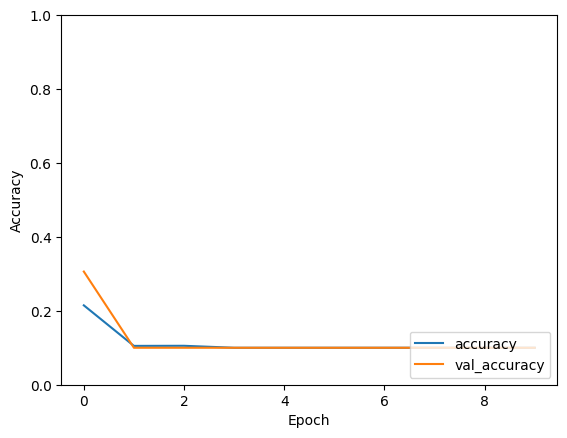

In [2]:
#Importar Bibliotecas
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

#Cargar y preprocesar el conjunto de datos CIFAR10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

#Construir la arquitectura de la CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

#Compilar el modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

#Entrenar el modelo
hist = model.fit(train_images, train_labels, epochs=10,
                 validation_data=(test_images, test_labels))

#Visualizar los resultados
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


# PROCESAMIENTO DE LENGUAJE NATURAL

In [4]:
# Importar las Librerias
from keras.datasets import imdb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# Cargar el conjunto de datos IMDB
(reviews_train_data, labels_train), (reviews_test_data, labels_test) = imdb.load_data()

# Decodificar las reseñas a texto
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
reviews_train = [' '.join([reverse_word_index.get(i - 3, '?') for i in review]) for review in reviews_train_data]
reviews_test = [' '.join([reverse_word_index.get(i - 3, '?') for i in review]) for review in reviews_test_data]
labels = np.concatenate([labels_train, labels_test])

# Tomar una muestra más pequeña del conjunto de datos
sample_size = 5000
reviews_sample = reviews_train[:sample_size]
labels_sample = labels[:sample_size]

# Dividir el conjunto de datos en entrenamiento y prueba
reviews_train, reviews_test, labels_train, labels_test = train_test_split(reviews_sample, labels_sample, test_size=0.3, random_state=42)

# Utilizar TF-IDF para convertir el texto en una representación numérica
vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(reviews_train)
x_test = vectorizer.transform(reviews_test)

# Crear y entrenar una Máquina de Soporte Vectorial
clf = SVC()
clf.fit(x_train, labels_train)

# Predecir en el conjunto de prueba
predictions = clf.predict(x_test)

# Calcular la precisión
accuracy = accuracy_score(labels_test, predictions)
print("Accuracy:", accuracy)


1641221/1641221 [==============================] - 1s 0us/step
Accuracy: 0.8573333333333333


In [6]:
# Importar las Librerias
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split

# Cargar el conjunto de datos 20 Newsgroups
newsgroups_data = fetch_20newsgroups(subset='all')

# Extraer los documentos y las etiquetas
documents = newsgroups_data.data
labels = newsgroups_data.target

# Dividir el conjunto de datos en entrenamiento y prueba
documents_train, documents_test, labels_train, labels_test = train_test_split(documents, labels, test_size=0.3, random_state=42)

# Crear un objeto TfidfVectorizer para convertir el texto en una representación numérica
vectorizer = TfidfVectorizer()

# Ajustar y transformar los documentos de entrenamiento
x_train = vectorizer.fit_transform(documents_train)

# Transformar los documentos de prueba
x_test = vectorizer.transform(documents_test)

# Crear y entrenar un clasificador Naive Bayes
clf = MultinomialNB()
clf.fit(x_train, labels_train)

# Predecir en el conjunto de prueba
predictions = clf.predict(x_test)

# Calcular la precisión
accuracy = accuracy_score(labels_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.8363990095507605
